In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your cleaned dataset
df = pd.read_csv('keywords_data.csv')

# Map intent codes to readable names
intent_map = {
    'i': 'Informational',
    'c': 'Commercial',
    't': 'Transactional',
    'n': 'Navigational'
}
df['Intent_Label'] = df['primary intent'].map(intent_map)

# List of Rank Difference columns to analyze geographic shifts
diff_cols = [
    'yachting-pages.com_rank_difference',
    'superyachttimes.com_rank_difference',
    'superyachtcontent.com_rank_difference',
    'superyachtservicesguide.com_rank_difference',
    'boatinternational.com_rank_difference'
]

--- Intent Segmentation: Difficulty Analysis ---
                    mean  median  count
Intent_Label                           
Informational  23.909091    20.0   6413
Transactional  24.774194    21.0     31
Commercial     27.519525    24.0   1178
Navigational   35.169492    31.5    236


C:\Users\Sameeha\AppData\Local\Temp\ipykernel_20104\1599544734.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Intent_Label', y='Keyword Difficulty', palette='coolwarm')


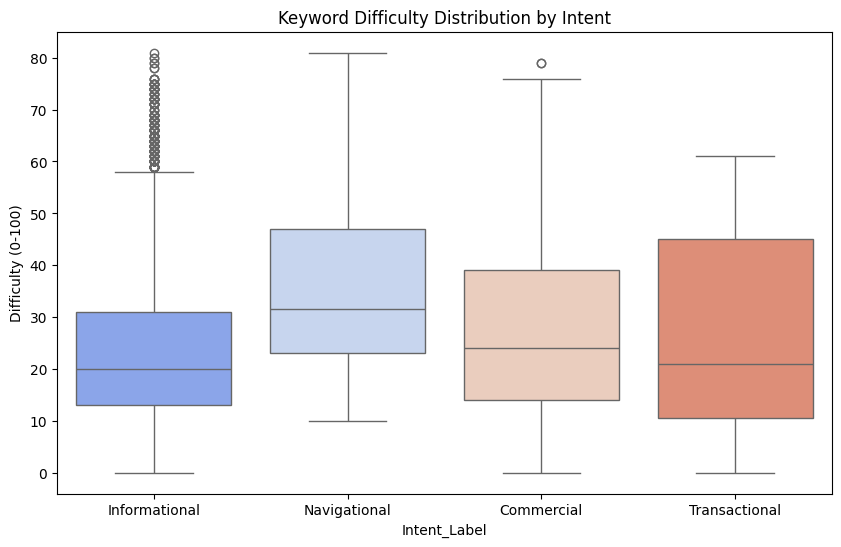

In [2]:
# Group by Intent and calculate mean Keyword Difficulty
intent_difficulty = df.groupby('Intent_Label')['Keyword Difficulty'].agg(['mean', 'median', 'count']).sort_values(by='mean')

print("--- Intent Segmentation: Difficulty Analysis ---")
print(intent_difficulty)

# Visualize the spread of Difficulty across Intents
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Intent_Label', y='Keyword Difficulty', palette='coolwarm')
plt.title('Keyword Difficulty Distribution by Intent')
plt.ylabel('Difficulty (0-100)')
plt.show()

--- Geographic Pivot: Average Rank Change by Country ---
                    Yachting Pages  Superyachttimes  Superyachtcontent  \
Country                                                                  
Dominican Republic        0.063536         2.369403           3.004219   
France                    1.592944        -1.154286           0.598253   
Germany                  -0.918768         1.284895           2.080717   
Greece                    0.548913         2.099825           0.061947   
Spain                    -0.144231         0.422018           1.287611   
Turkey                   -0.329655         0.781753           0.909836   
UAE                       0.220000         0.952468           0.807087   
UK                       -0.377333         1.449541          -0.269841   
USA                       0.026439        -0.682156           1.214815   

                    Superyachtservicesguide  Boatinternational  
Country                                                        

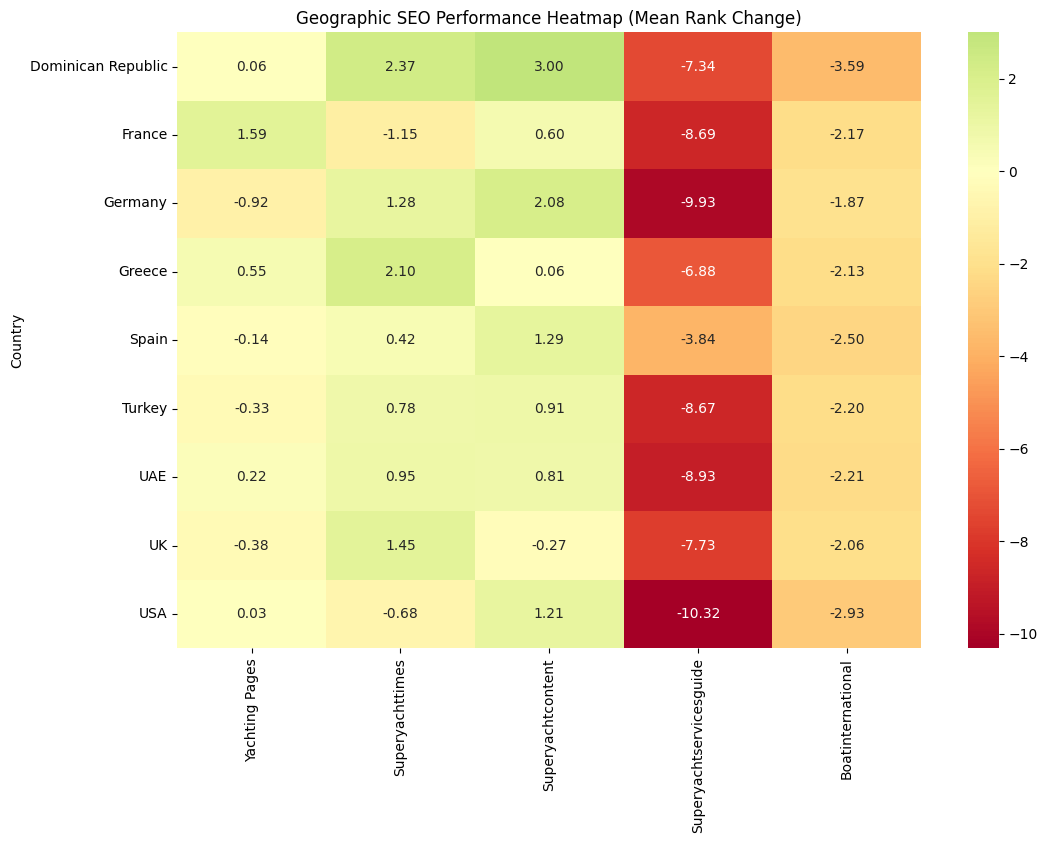

In [3]:
# Create a pivot table: Rows = Country, Columns = Average Rank Difference per Competitor
geo_pivot = df.groupby('Country')[diff_cols].mean()

# Rename columns for the heatmap to be cleaner
geo_pivot.columns = [c.split('.')[0].replace('-', ' ').title() for c in geo_pivot.columns]

print("--- Geographic Pivot: Average Rank Change by Country ---")
print(geo_pivot)

# Visualize with a Heatmap
plt.figure(figsize=(12, 8))
# We use a diverging colormap (RdYlGn) where Green = Improvement, Red = Decline
sns.heatmap(geo_pivot, annot=True, cmap='RdYlGn', center=0, fmt=".2f")
plt.title('Geographic SEO Performance Heatmap (Mean Rank Change)')
plt.show()

In [4]:
# Pivot to see the Average CPC and Difficulty per Country
market_context = df.pivot_table(
    index='Country', 
    values=['CPC', 'Keyword Difficulty', 'Search Volume'], 
    aggfunc='mean'
).sort_values(by='CPC', ascending=False)

print("--- Market Context by Country ---")
print(market_context)

--- Market Context by Country ---
                         CPC  Keyword Difficulty  Search Volume
Country                                                        
USA                 2.714624           21.866438     178.995434
UAE                 1.271379           22.220320      21.917808
UK                  1.196627           23.825342      76.164384
Spain               1.193659           26.319635      16.392694
France              1.043250           24.644977      21.643836
Germany             0.830556           24.513699      26.575342
Greece              0.780000           24.617580      21.689498
Turkey              0.479804           26.278539      58.858447
Dominican Republic  0.408000           28.710046       6.712329
